<a href="https://colab.research.google.com/github/San13deep/-Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

# **Problem Description**

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments.

## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# **1. Import Data**

In [91]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

from sklearn import metrics  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
!pip install --upgrade xlrd

In [94]:
# loading csv File
file_path = ('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Credit Card Default Prediction/default of credit card clients.xls')
df=pd.read_excel(file_path)

In [95]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# **2. Understand the Data**

In [96]:
df.shape

(30000, 25)

In [97]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'DEF_PAY_NMO'},inplace = True)

In [98]:
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY_NMO
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [99]:
pay = df[['PAY_1',	'PAY_2'	,'PAY_3','PAY_4',	'PAY_5',	'PAY_6']]
pay_melt = pd.melt(pay)
print(pay_melt['value'].value_counts())

 0    95919
-1    34640
-2    24415
 2    18964
 1     3722
 3     1430
 4      453
 7      218
 5      137
 6       74
 8       28
Name: value, dtype: int64


Text(0.5, 1.0, ' proportion of customers who had default payment in the next month')

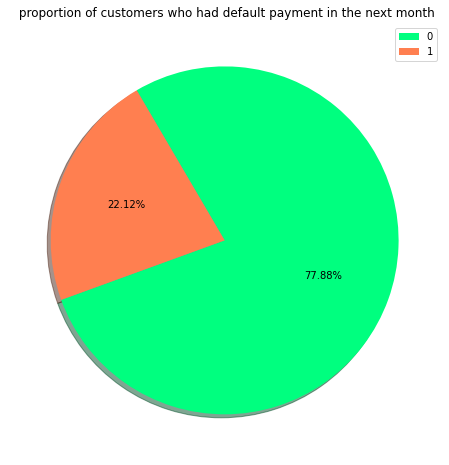

In [100]:
from locale import normalize
# Get the proportion of customers who had default payment in the next month (Oct.2005)? 
# About 22% customers had default payment next month

x=df['DEF_PAY_NMO'].value_counts(normalize=True)
plt.figure(figsize=(8,8))
plt.pie(x, colors=['springgreen', 'coral'], shadow=True, autopct='%1.2f%%', startangle=200)
plt.legend(labels=['0','1'])
plt.title(" proportion of customers who had default payment in the next month")

## **3. Data Cleanning**

**(1) Check duplicate records**

In [101]:
# Check if there is any duplicate IDs
condition = bool(df.duplicated(subset = 'ID').any())

if condition:
    print('There are duplicate IDs')
else:
    print('No duplicate IDs')

No duplicate IDs


**(2) Identify outliers**

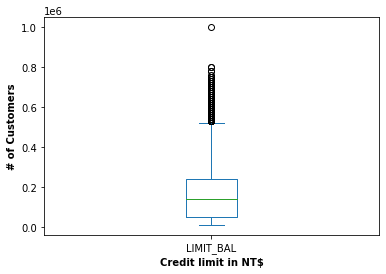

In [102]:
df["LIMIT_BAL"].plot(kind="box")
plt.xlabel('Credit limit in NT$', fontweight='bold')
plt.ylabel('# of Customers', fontweight='bold')
plt.show()

In [103]:
outliers = df.loc[df['LIMIT_BAL']>900000]
outliers

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY_NMO
2197,2198,1000000,2,1,1,47,0,0,0,-1,0,0,964511,983931,535020,891586,927171,961664,50784,50723,896040,50000,50000,50256,0


**(3) Check numerical columns**

In [104]:
# Get the statistic summary of the columns
# No data is extremly unresonable in these columns

df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY_NMO
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


**(4) Check categorical columns**

In [105]:
# Get SEX column's distribution. 1: male; 2: female
# No undocumented SEX code

df["SEX"].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [106]:
print(df['EDUCATION'].unique())
df['EDUCATION'].value_counts()


[2 1 3 5 4 6 0]


2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [107]:
df['EDUCATION']=df['EDUCATION'].replace({4:0,5:0,6:0})


In [108]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

In [109]:
# From dataset description: MARRIAGE: Marital status (1=married, 2=single, 3=others), but there is also 0

# df["MARRIAGE"].unique()
print(df['MARRIAGE'].value_counts())

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


In [110]:
df["MARRIAGE"] = df["MARRIAGE"].replace({0:3})
print(df['MARRIAGE'].value_counts())

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64


### **4. Trends, Hypotheses and Findings**

In [111]:
# Create a new column "HAS_DEF" to indicate customers who have at least 1 default payment from PAY_1 to Pay_6
# 0 : no default ; 1: has default

def_condition =(df.PAY_1>1) | (df.PAY_2>1) | (df.PAY_3>1) | (df.PAY_4>1) | (df.PAY_5>1) | (df.PAY_6>1)
df.loc[def_condition, "HAS_DEF"] = 1
df.loc[df.HAS_DEF.isna(), "HAS_DEF"] = 0
# print(type(def_condition))

In [112]:
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY_NMO,HAS_DEF
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1.0
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,1.0
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0.0


In [113]:
# Define a function to plot bar chart since there will be multiple bars charts to plot
def relationship_bar(column):
   # Get the percentage of default by each group
    default_by_group = pd.crosstab(index=df['HAS_DEF'],columns = df[column], normalize = 'columns')
      # Round up to 2 decimal
    default_by_group = default_by_group.apply(lambda x: round(x,2))
    
    labels = default_by_group.columns
    list1 = default_by_group.iloc[0].to_list()
    list2 = default_by_group.iloc[1].to_list()
    list1_name = "No default"
    list2_name = "Has default"
    title = f"Default by {column}"
    xlabel = column
    ylabel = "Default percentage"
    
    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.5
    
    ax1 = ax.bar(labels,list1, bar_width, label = list1_name)
    ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name)

    ax.set_title(title, fontweight = "bold")
    ax.set_xlabel(xlabel, fontweight = "bold")
    ax.set_ylabel(ylabel, fontweight = "bold")
    ax.legend(loc="best")
    
    plt.xticks(list(range(len(labels))), labels,rotation=90)
    plt.yticks(fontsize=9)

    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")

    plt.show()

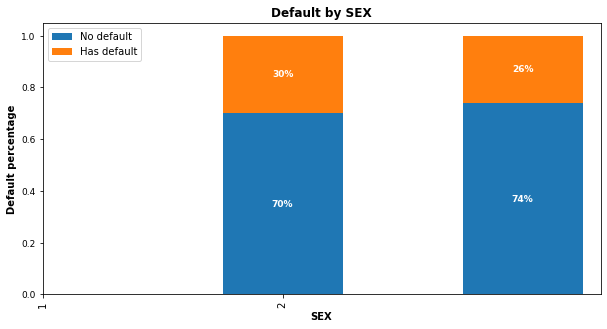

In [154]:
relationship_bar("SEX")

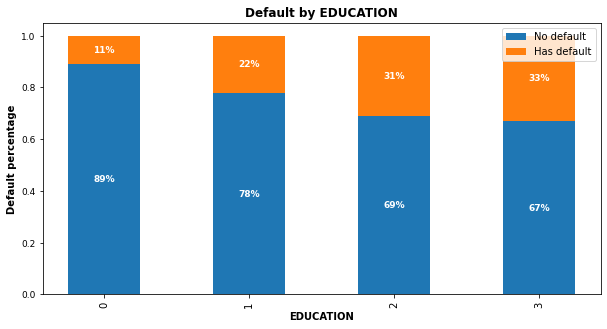

In [114]:
# Plot a bar chart to show default by education level
relationship_bar('EDUCATION')

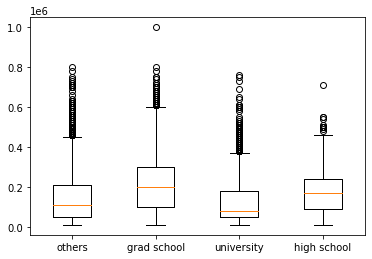

[0         20000
1        120000
2         90000
3         50000
4         50000
          ...  
29990    140000
29991    210000
29994     80000
29997     30000
29999     50000
Name: LIMIT_BAL, Length: 14030, dtype: int64, 5         50000
6        500000
11       260000
14       250000
16        20000
          ...  
29986    360000
29987    130000
29988    250000
29989    150000
29993    100000
Name: LIMIT_BAL, Length: 10585, dtype: int64, 8        140000
9         20000
10       200000
15        50000
20       130000
          ...  
29980     50000
29992     10000
29995    220000
29996    150000
29998     80000
Name: LIMIT_BAL, Length: 4917, dtype: int64, 47       150000
69        20000
358      110000
385      410000
448      200000
          ...  
29836    180000
29839    150000
29847    310000
29920     50000
29966    150000
Name: LIMIT_BAL, Length: 468, dtype: int64]


In [115]:
# Use boxplot to visualize credit limit grouped by education level

data = []
x=df['EDUCATION'].unique()
for i in x:
    temp = df.loc[df.EDUCATION == i, "LIMIT_BAL"]
    data.append(temp)

fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(["others","grad school", "university", "high school"])

plt.show()
print(data)

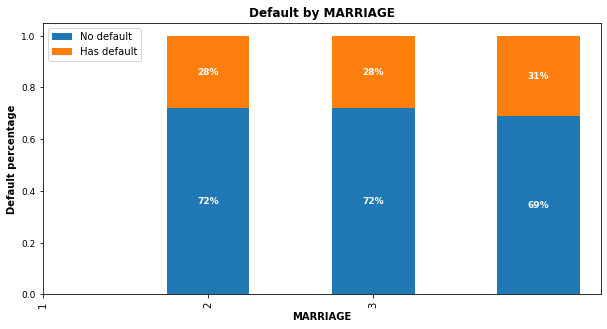

In [116]:
# Plot a bar chart to visualize default and non-default distribution by marital status 
relationship_bar('MARRIAGE')

In [155]:
# Segment the 'AGE' column to 6 groups

bins= [21,30,40,50,60,70,80]
labels = ['20-30','30-40','40-50','50-60','60-70','70-80']
df['AGE'] = pd.cut(df['AGE'],bins=bins, labels=labels,right=False)

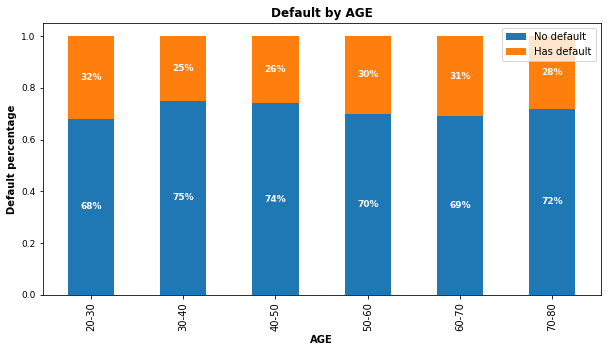

In [156]:
relationship_bar('AGE')

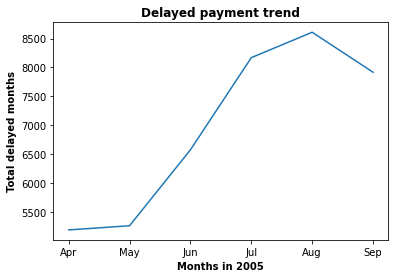

In [117]:
# Subset a dataframe with the records that have default
has_default = df[df['HAS_DEF']== 1]

default_trend = has_default[['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_1']].sum(axis=0)

# Draw a line chart to show the trend. The lower the number, the shorter delayed payment
fig,ax = plt.subplots()
ax.plot(default_trend)
plt.xticks(['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_1'],['Apr','May','Jun','Jul','Aug','Sep'])

plt.xlabel('Months in 2005',fontweight='bold')
plt.ylabel('Total delayed months',fontweight='bold')
plt.title('Delayed payment trend',fontweight='bold')

plt.show()

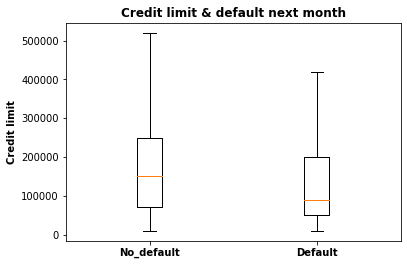

In [118]:
# Make a boxplot to visualize credit limit and default payment next month
# 1: default next month; 0: no default next month
def0 = df.loc[df['DEF_PAY_NMO'] == 0,'LIMIT_BAL']
def1 = df.loc[df['DEF_PAY_NMO'] == 1,'LIMIT_BAL']

fig, ax = plt.subplots()
ax.boxplot([def0, def1],  showfliers=False)

ax.set_xticklabels(['No_default',"Default"],fontweight ='bold')
ax.set_ylabel('Credit limit',fontweight ='bold')
ax.set_title('Credit limit & default next month',fontweight ='bold')

plt.show()

In [119]:
# Get statistic summary of bill statement columns
# The min numbers are negative
bill = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]
bill.describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [120]:
# How many bills have negative amount?
# There are 3932 bills with negative amounts, each month has 599-688 records 
bill_melt = pd.melt(bill, var_name = 'bill_cycle',value_name = 'amount')
neg_bill = bill_melt[bill_melt['amount']<0]
neg_bill.groupby('bill_cycle').count()

,amount
bill_cycle,
BILL_AMT1,590
BILL_AMT2,669
BILL_AMT3,655
BILL_AMT4,675
BILL_AMT5,655
BILL_AMT6,688


In [121]:
# Get the average amount of negative bill each month
# Use USD/NTD = 30 to get the amount in USD. The average negative amount is $38-$102

neg_bill_mean_ndt = neg_bill.groupby('bill_cycle')['amount'].mean()

print('Average negative amounts in NTD are: \n')
print(neg_bill_mean_ndt)
print('\nAverage negative amounts in USD are: \n')
print(neg_bill_mean_ndt/30)

Average negative amounts in NTD are: 

bill_cycle
BILL_AMT1   -1154.796610
BILL_AMT2   -1230.621824
BILL_AMT3   -1466.291603
BILL_AMT4   -1631.242963
BILL_AMT5   -1634.708397
BILL_AMT6   -3074.492733
Name: amount, dtype: float64

Average negative amounts in USD are: 

bill_cycle
BILL_AMT1    -38.493220
BILL_AMT2    -41.020727
BILL_AMT3    -48.876387
BILL_AMT4    -54.374765
BILL_AMT5    -54.490280
BILL_AMT6   -102.483091
Name: amount, dtype: float64


In [122]:
# Is there any bill amount that is greater than credit limit?

condition1 = df['BILL_AMT1'] > df['LIMIT_BAL'] 
condition2 = df['BILL_AMT2'] > df['LIMIT_BAL'] 
condition3 = df['BILL_AMT3'] > df['LIMIT_BAL'] 
condition4 = df['BILL_AMT4'] > df['LIMIT_BAL'] 
condition5 = df['BILL_AMT5'] > df['LIMIT_BAL'] 
condition6 = df['BILL_AMT6'] > df['LIMIT_BAL'] 

large_bill = df[condition1 | condition2 |condition3 | condition4 | condition5 | condition6]
large_bill['HAS_DEF'].value_counts()

0.0    2184
1.0    1747
Name: HAS_DEF, dtype: int64

In [123]:
bill_amt = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]
no_transaction = bill_amt[bill_amt.sum(axis=1) ==0]
no_transaction
no_transaction_de=df.loc[no_transaction.index,['DEF_PAY_NMO']]
no_transaction_de.value_counts()

DEF_PAY_NMO
0              553
1              317
dtype: int64

In [124]:
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY_NMO,HAS_DEF
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1.0
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,1.0
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0.0


In [125]:
# Define predictor variables and target variable
X = df.drop(columns=['ID','DEF_PAY_NMO'])
y = df['DEF_PAY_NMO']

# Save all feature names as list
feature_cols = X.columns.tolist() 
#print(feature_cols)
# Extract numerical columns and save as a list for rescaling
X_num = X.drop(columns=['SEX', 'EDUCATION', 'MARRIAGE', 'AGE'])
num_cols = X_num.columns.tolist() 
print(num_cols)

['LIMIT_BAL', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'HAS_DEF']


0    0.7788
1    0.2212
Name: DEF_PAY_NMO, dtype: float64


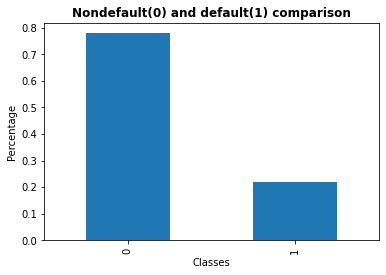

In [126]:
# Check target classes balancec
cla_bal = df['DEF_PAY_NMO'].value_counts(normalize=True)
print(cla_bal)

# Plot the classes
cla_bal.plot(kind = 'bar')
plt.title('Nondefault(0) and default(1) comparison',fontweight = "bold")
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.show()

In [127]:
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY_NMO,HAS_DEF
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1.0
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,1.0
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0.0


In [128]:
#define a function that count for imbalances

def data_split(x,y,imbalance=False):
  '''
This function will split the data according to the imbalance in the data set 
if imbalance is there in then use SMOTE Analysis   '''

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle=True, stratify=y, random_state=42)
  if imbalance:
    from imblearn.over_sampling import SMOTE
    sm = SMOTE(random_state = 42)
    X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

  
  return X_train, X_test, y_train, y_test

In [129]:
# Define function to rescale training data using StandardScaler
def rescaling(X_train, X_test, numerical_cols):
    
    # Make copies of dataset
    X_train_std = X_train.copy()
    X_test_std = X_test.copy()
    
    # Apply standardization on numerical features only
    for i in numerical_cols:
        scl = StandardScaler().fit(X_train_std[[i]])     # fit on training data columns
        X_train_std[i] = scl.transform(X_train_std[[i]]) # transform the training data columns
        X_test_std[i] = scl.transform(X_test_std[[i]])   # transform the testing data columns
    
    return X_train_std,X_test_std

In [130]:
def logistic_regression(imbalance=False):

  X_train, X_test, y_train, y_test=data_split(X,y,imbalance=imbalance)
  X_train_std,X_test_std=rescaling(X_train,X_test,numerical_cols = num_cols)
  #print(X_train_std)
  clf_lr = LogisticRegression(random_state=42)
  clf_lr.fit(X_train_std, y_train)
  scores = cross_val_score(clf_lr, X_train_std, y_train, scoring ="roc_auc", cv = 5)
  roc_auc_lr = np.mean(scores)

  if imbalance:
    return "Logistic Regression","With SMOTE",roc_auc_lr
  else:
    return "Logistic Regression","Without SMOTE",roc_auc_lr
    
model_result=[]
model_result.append(logistic_regression())    
model_result.append(logistic_regression(imbalance=True))
pd.DataFrame(model_result,columns=['Model','Smote','ROC_AUC'])

,Model,Smote,ROC_AUC
0,Logistic Regression,Without SMOTE,0.748903
1,Logistic Regression,With SMOTE,0.809076


In [131]:
# Randomized search for the best C parameter
# Split data with SMOTE 
X_train, X_test, y_train, y_test = data_split(X, y, imbalance = True) 

# Rescale data
X_train_std, X_test_std = rescaling(X_train, X_test, numerical_cols = num_cols)

logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=42)
distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1','elasticnet'])
clf = RandomizedSearchCV(logistic, distributions, random_state=42)

lr_best= clf.fit(X_train_std, y_train)   
#print(distributions)
print(lr_best.best_params_)

{'C': 2.387400631785948, 'penalty': 'l1'}


In [132]:
scores = cross_val_score(lr_best, X_train_std, y_train, scoring ="roc_auc", cv = 5)
roc_auc_lr = np.mean(scores)

print(f'Roc_Auc score for the Logistic regression with SMOTE :{roc_auc_lr,".3f"}')

Roc_Auc score for the Logistic regression with SMOTE :(0.7916188799022305, '.3f')


In [133]:
def precision_recall(model,X_test,y_test):
  y_pred=model.predict(X_test)
  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
  precision = tp / (tp + fp)
  recall = tp / (tp + fn)
  F1 = 2 * (precision * recall) / (precision + recall)


  print(f'Precision:{precision:.3f}\nRecall:{recall:.3f}\nF1 score:{F1:.3f}')

In [134]:
precision_recall(lr_best,X_test_std,y_test)

Precision:0.430
Recall:0.601
F1 score:0.501


In [135]:
def RandomForest(imbalance=False):
   X_train, X_test, y_train, y_test=data_split(X,y,imbalance=imbalance)
   X_train_std,X_test_std=rescaling(X_train,X_test,numerical_cols = num_cols)
   clf_lr = RandomForestClassifier(random_state=42)
   clf_lr.fit(X_train_std, y_train)
   scores = cross_val_score(clf_lr, X_train_std, y_train, scoring ="roc_auc", cv = 5)
   roc_auc_lr = np.mean(scores)

   if imbalance:
     return "Random Forest","With SMOTE",roc_auc_lr
   else:
     return "Random Forest","Without SMOTE",roc_auc_lr
    
model_result=[]
model_result.append(RandomForest())    
model_result.append(RandomForest(imbalance=True))
pd.DataFrame(model_result,columns=['Model','Smote','ROC_AUC'])

,Model,Smote,ROC_AUC
0,Random Forest,Without SMOTE,0.764085
1,Random Forest,With SMOTE,0.927134


In [136]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY_NMO,HAS_DEF
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1.0
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,1.0
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0.0


In [137]:
# Split data with SMOTE
X_train_sm, X_test, y_train_sm, y_test = data_split(X, y, imbalance = True)

In [138]:
# Create parameter grid  
param_grid = {
    'max_depth': [60, 90, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

# Instantiate the model
clf_rf = RandomForestClassifier()

# Instantiate grid search model
grid_search = GridSearchCV(estimator = clf_rf, param_grid = param_grid,    
                          cv = 2, n_jobs = -1, verbose = 1)

# Fit grid search to the data
grid_search.fit(X_train_sm, y_train_sm)
grid_search.best_params_

Fitting 2 folds for each of 81 candidates, totalling 162 fits


{'max_depth': 110,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [139]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=110, min_samples_leaf=3, min_samples_split=8,
                       n_estimators=200)

In [140]:
rf_best = RandomForestClassifier(**grid_search.best_params_)   
rf_best.fit(X_train_sm,y_train_sm)

scores_best = cross_val_score(rf_best, X_train_sm, y_train_sm, scoring ="roc_auc", cv = 3)
roc_auc_best = np.mean(scores_best)

print(f'ROC_AUC training score after tuning for Random Forest: {roc_auc_best:.3f}')

ROC_AUC training score after tuning for Random Forest: 0.912


In [141]:
print("The F1 score,Precision and Recall value for Random Forest :")
precision_recall(rf_best,X_test,y_test)

The F1 score,Precision and Recall value for Random Forest :
Precision:0.544
Recall:0.496
F1 score:0.519


In [142]:
def xgboost(imbalance=False):
   X_train, X_test, y_train, y_test=data_split(X,y,imbalance=imbalance)
   X_train_std,X_test_std=rescaling(X_train,X_test,numerical_cols = num_cols)
   clf_lr = XGBClassifier(random_state=42)
   clf_lr.fit(X_train_std, y_train)
   scores = cross_val_score(clf_lr, X_train_std, y_train, scoring ="roc_auc", cv = 5)
   roc_auc_lr = np.mean(scores)

   if imbalance:
     return "XGBOOST","With SMOTE",roc_auc_lr
   else:
     return "XGBOOST","Without SMOTE",roc_auc_lr
    
model_result=[]
model_result.append(xgboost())    
model_result.append(xgboost(imbalance=True))
pd.DataFrame(model_result,columns=['Model','Smote','ROC_AUC'])


,Model,Smote,ROC_AUC
0,XGBOOST,Without SMOTE,0.782848
1,XGBOOST,With SMOTE,0.882986


In [143]:
# Split data with SMOTE
X_train_sm, X_test, y_train_sm, y_test = data_split(X, y, imbalance = True)

In [144]:
params = { 
    'gamma':0,
    'learning_rate':0.01, 
    'max_depth':3, 
    'colsample_bytree':0.6,
    'subsample':0.8,
    'scale_pos_weight':3.5,
    'n_estimators':1000,
    'objective':'binary:logistic', 
    'reg_alpha':0.3    
}

clf_xgb=XGBClassifier(**params)

scores_best = cross_val_score(clf_xgb, X_train_sm, y_train_sm, scoring ="roc_auc", cv = 3)
roc_auc_best = np.mean(scores_best)
print(f'ROC_AUC training score after tuning for initial parameter in XGBOOST: {roc_auc_best:.3f}')

ROC_AUC training score after tuning for initial parameter in XGBOOST: 0.869


In [145]:
n_estimators = np.arange(200,1000,200)

# Minimum loss reduction required to make a further partition on a leaf node of the tree
# The larger gamma is, the more conservative the algorithm will be
gamma = np.arange(0.1,0.6,0.1)

# Default 0.3, range(0,1)
learning_rate = np.arange(0.1,0.6,0.1)

# Maximum number of levels in tree
max_depth = list(range(3,8,1))

# Subsample ratio of the training instances.Range(0,1)
subsample = np.arange(0.5,0.9,0.1)

# Subsample ratio of columns when constructing each tree. Range(0,1)
colsample_bytree = np.arange(0.5,0.9,0.1)

# Control the balance of positive and negative weights
# Sum(negative instances) / sum(positive instances)
scale_pos_weight = [1,3.5]


# Create the random grid
random_grid_xgb = {'n_estimators': n_estimators,
                   'gamma': gamma,
                   'learning_rate':learning_rate,
                   'max_depth': max_depth,
                   'subsample':subsample,
                   'colsample_bytree':colsample_bytree,
                   'scale_pos_weight':scale_pos_weight
                  }
print(random_grid_xgb)     

{'n_estimators': array([200, 400, 600, 800]), 'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5]), 'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5]), 'max_depth': [3, 4, 5, 6, 7], 'subsample': array([0.5, 0.6, 0.7, 0.8]), 'colsample_bytree': array([0.5, 0.6, 0.7, 0.8]), 'scale_pos_weight': [1, 3.5]}


In [146]:
xgboost = XGBClassifier()
xgb_random = RandomizedSearchCV(estimator = xgboost, 
                                param_distributions = random_grid_xgb, 
                                n_iter = 10, 
                                cv = 2, 
                                verbose=1, 
                                random_state=42, 
                                n_jobs = -1,
                                scoring ='roc_auc')


xgb_random.fit(X_train_sm, y_train_sm)   
xgb_random.best_params_, xgb_random.best_score_

print(xgb_random.best_params_,xgb_random.best_score_)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
{'subsample': 0.7, 'scale_pos_weight': 1, 'n_estimators': 400, 'max_depth': 7, 'learning_rate': 0.4, 'gamma': 0.2, 'colsample_bytree': 0.7999999999999999} 0.8935733068431269


In [147]:
print("The F1 score, Precision and Recall for XGBOOST is :")
precision_recall(xgb_random,X_test,y_test)

The F1 score, Precision and Recall for XGBOOST is :
Precision:0.491
Recall:0.430
F1 score:0.459


Text(0.5, 1.0, 'XGBOOST')

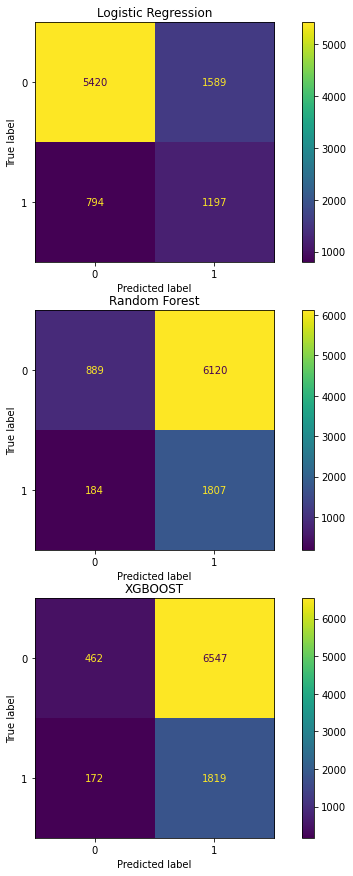

In [148]:
fig,ax=plt.subplots(3,1,figsize=(10,15))

plot_confusion_matrix(lr_best,X_test_std,y_test,ax=ax[0])
ax[0].set_title("Logistic Regression")

plot_confusion_matrix(rf_best,X_test_std,y_test,ax=ax[1])
ax[1].set_title("Random Forest")

plot_confusion_matrix(xgb_random,X_test_std,y_test,ax=ax[2])
ax[2].set_title("XGBOOST")

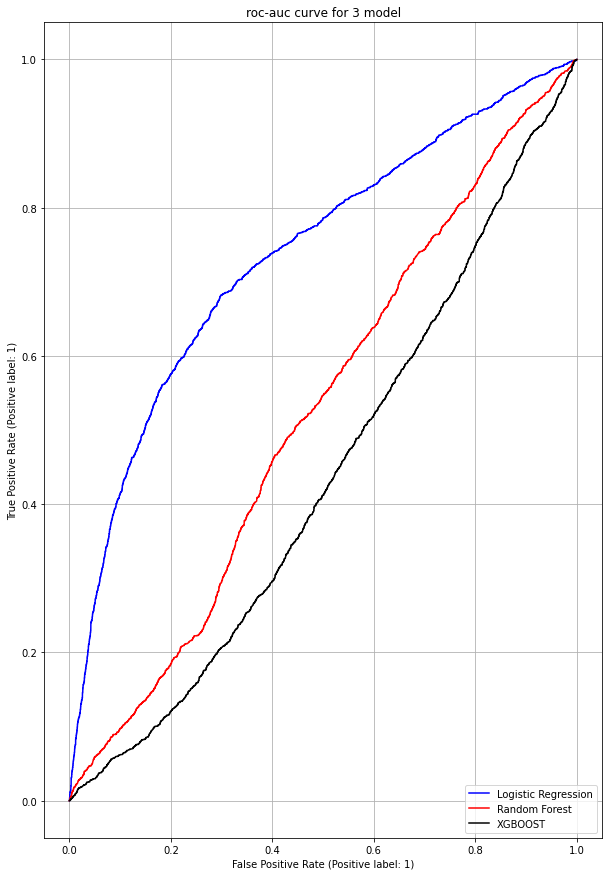

In [149]:
fig,ax=plt.subplots(figsize=(10,15))

plot_roc_curve(lr_best,X_test_std,y_test,ax=ax,color='Blue',label='Logistic Regression')
plot_roc_curve(rf_best,X_test_std,y_test,ax=ax,color='Red',label='Random Forest')
plot_roc_curve (xgb_random,X_test_std,y_test,ax=ax,color='Black',label='XGBOOST')

plt.title("roc-auc curve for 3 model")
plt.grid()

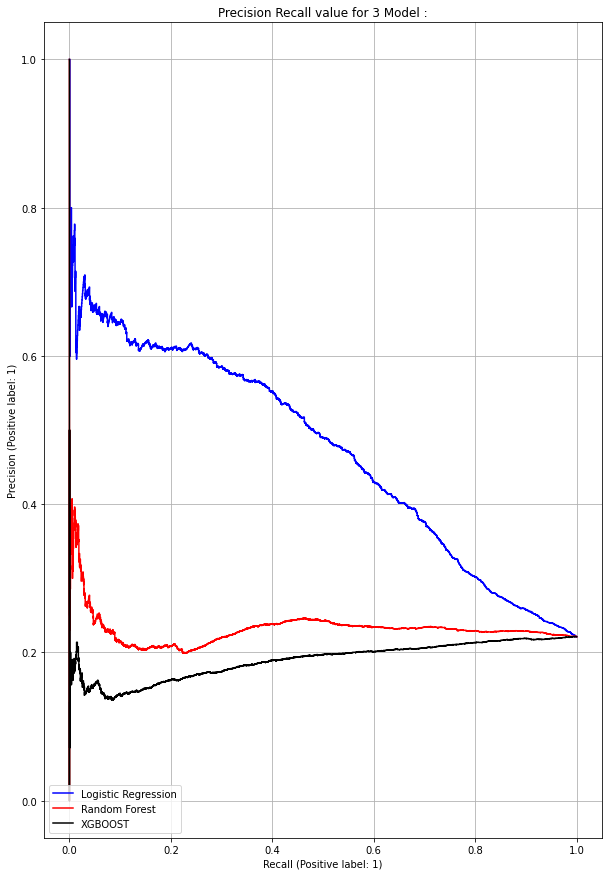

In [150]:
fig,ax=plt.subplots(figsize=(10,15))

plot_precision_recall_curve(lr_best,X_test_std,y_test,ax=ax,color='Blue',label='Logistic Regression')
plot_precision_recall_curve(rf_best,X_test_std,y_test,ax=ax,color='Red',label='Random Forest')
plot_precision_recall_curve(xgb_random,X_test_std,y_test,ax=ax,color='Black',label='XGBOOST')
plt.title("Precision Recall value for 3 Model :")
plt.grid()

In [151]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)
DummyClassifier(strategy='stratified')
y_pred_dummy = dummy_clf.predict(X_test)

print('Dummy model:')
precision_recall(dummy_clf, X_test, y_test)

Dummy model:
Precision:0.218
Recall:0.491
F1 score:0.302


In [152]:
# Compute precision, recall and threshold of Random Forest

y_predict_rf = rf_best.predict_proba(X_test)

y_scores_rf = y_predict_rf[:,1]
#print(y_scores_rf)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores_rf)
#print(precisions)
#print(recalls)
#print(thresholds)
recalls_80 = recalls[np.argmin(recalls >= 0.80)]               # Recommend recall score = 0.8
precision_80 = precisions[np.argmin(recalls >= 0.80)]
threshold_80_recall = thresholds[np.argmin(recalls >= 0.80)]

thresholds = np.append(thresholds, 1)

recalls_80, precision_80, threshold_80_recall

(0.7995981918633852, 0.3368599238256454, 0.22643145743145746)

Text(0.5, 1.0, 'Features importance')

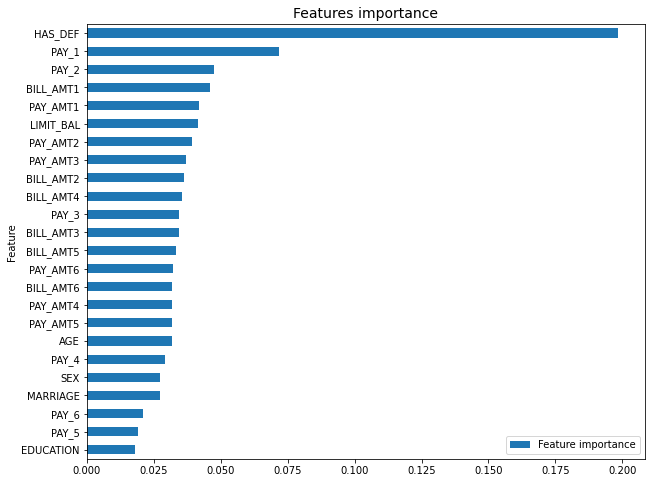

In [153]:
# Plot feature importance of winner model - Random Forest

fea_df = pd.DataFrame({'Feature': feature_cols, 'Feature importance': rf_best.feature_importances_})
fea_df = fea_df.sort_values(by='Feature importance')

figure, ax = plt.subplots(figsize = (10,8))
fea_df.plot.barh(x='Feature',y='Feature importance', ax=ax)
plt.title('Features importance',fontsize=14)

PAY_1" AND "Pay_2" are the most recent 2 months' payment status and they are the strongest predictors of future payment default risk.

# Conclusion
Logistic Regression model has the highest recall but the lowest precision, if the business cares recall the most, then this model is the best candidate. If the balance of recall and precision is the most important metric, then Random Forest is the ideal model. Since Random Forest has slightly lower recall but much higher precision than Logistic Regression, I would recommend Random Forest.